## Importing Library

In [254]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, roc_auc_score

from sklearn import datasets

## Exploring dataset

In [118]:
# load iris dataset

iris = datasets.load_iris()

In [119]:
# checking the keys in dictionary

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [120]:
# dependent column names

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [121]:
# dependent columns name

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [122]:
# load dependent and dependent

x_data = iris.data
y_data = iris.target

In [123]:
# creating a df

iris_df = pd.DataFrame(data = x_data, columns = iris.feature_names)
iris_df['target'] = y_data

In [124]:
# checking the first five row

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Here Target variable 0 = 'setosa', 1 = 'versicolor', 2 = 'virginica'

In [125]:
# no of rows and columns

iris_df.shape

(150, 5)

## Visualizing the data set

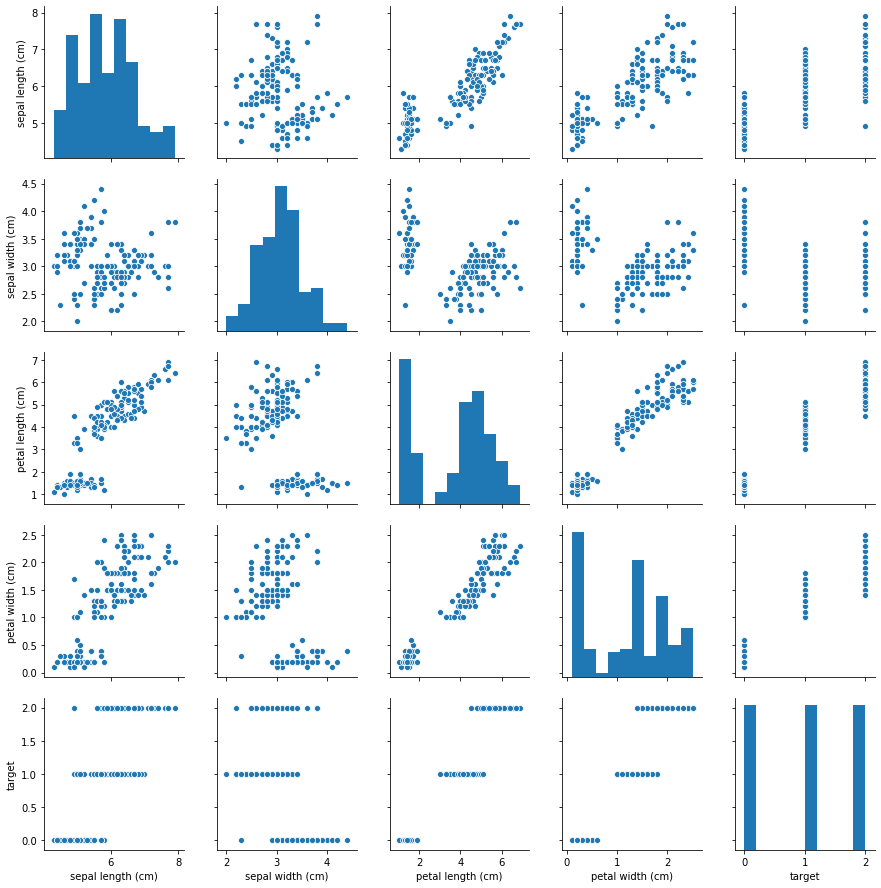

In [126]:
# pairplot the dataset

sns.pairplot(iris_df)

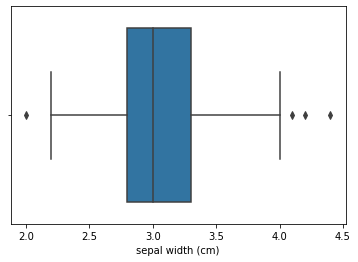

In [127]:
sns.boxplot(iris_df['sepal width (cm)'])

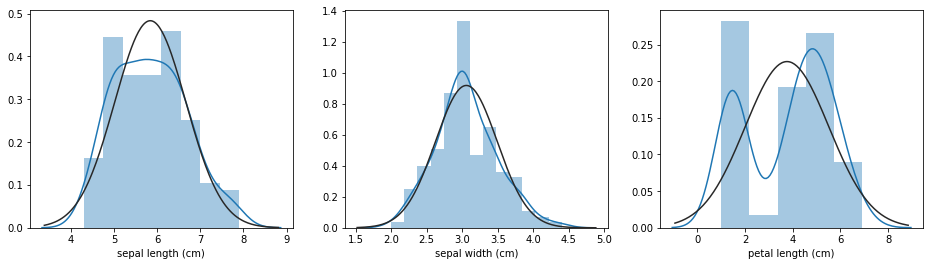

In [156]:
# plotting dist plot

fig, ax = plt.subplots(1, 3, figsize=(16,4))
sns.distplot(iris_df['sepal length (cm)'], fit=norm, ax=ax[0])
sns.distplot(iris_df['sepal width (cm)'], fit=norm, ax=ax[1])
sns.distplot(iris_df['petal length (cm)'], fit=norm, ax=ax[2])

## Spliting the data

In [128]:
x = iris_df.drop('target', axis=1)
y = iris_df['target']

In [129]:
# spliting into train and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify = y)

## modeling 

In [170]:
# creating an instance of decision tree classifier

tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

# fit the data

tree_classifier.fit(x_train, y_train)

# prediction for train and test data

y_predict_train = tree_classifier.predict(x_train)
y_predict_test = tree_classifier.predict(x_test)

## Model evaluation

In [171]:
# printing the accuracy score

print('Accuracy score:', accuracy_score(y_test, y_predict_test))

Accuracy score: 0.9666666666666667


In [237]:
# error rate

print('Error rate: ', 1 - accuracy_score(y_test, y_predict_test))

Error rate:  0.033333333333333326


In [246]:
# confusion matrix

cof_metrix = confusion_matrix(y_test, y_predict_test)
print('Confusion matrix :\n', cof_metrix)

Confusion matrix :
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


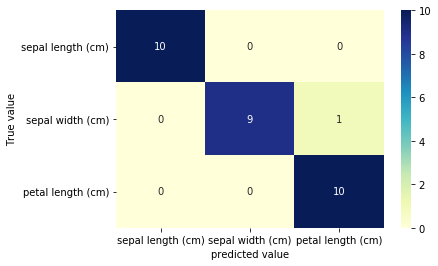

In [251]:
# visualize the conusfion matrix

sns.heatmap(cof_metrix, annot=True, cmap="YlGnBu", xticklabels=iris_df.columns[0: 3], yticklabels=iris_df.columns[0: 3])
plt.xlabel('predicted value')
plt.ylabel('True value')
plt.show()

In [248]:
# true positive (Recall)

print('True positive (Recall)', recall_score(y_test, y_predict_test, average='micro'))

# Precision 

print('Precision', precision_score(y_test, y_predict_test, average='micro'))

True positive (Recall) 0.9666666666666667
Precision 0.9666666666666667


In [229]:
# printing the classificaton report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [230]:
# using cross validation to evaluate model

model_evl = cross_val_score(tree_classifier, x, y, scoring='accuracy')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [207]:
print(model_evl)
print(model_evl.mean())
print(model_evl.std())

[0.98039216 0.92156863 0.97916667]
0.960375816993464
0.027445387307583054


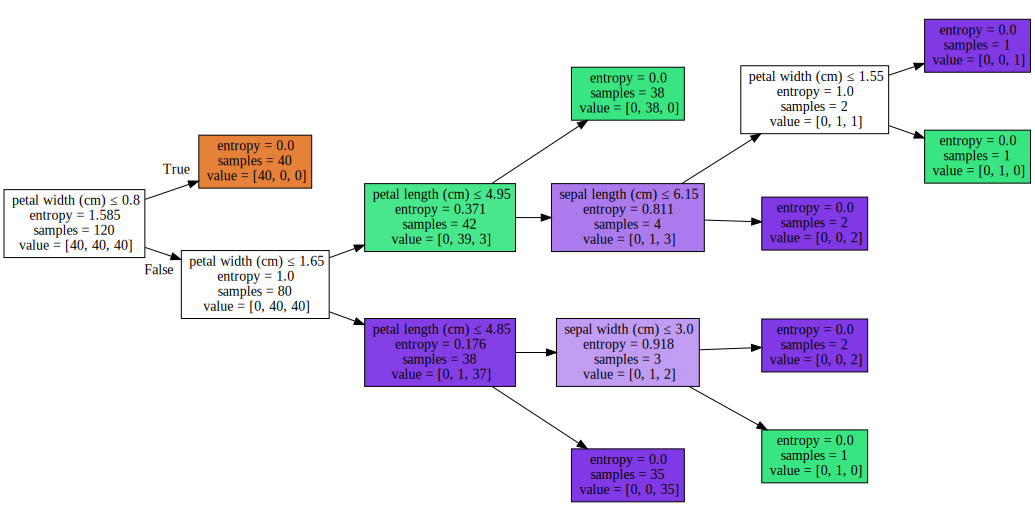

In [211]:
# visualize decision tree

from sklearn.tree import export_graphviz
import IPython, graphviz, re, math

def draw_tree(t, col_names, size=16, ratio=0.5, precision=3):
    
    s=export_graphviz(t, out_file=None, feature_names=col_names, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}',s)))

draw_tree(tree_classifier, iris.feature_names , precision=3)

### we got an Accuracy score: 0.9666666666666667  which is very good

In [271]:
# saving the model for future use

import pickle

# saving the model
with open('classifier_tree.sav', 'wb') as f:
    pickle.dump(tree_classifier, f)
    
# loading the model to use
with open('classifier_tree.sav', 'rb') as f:
    model = pickle.load(f)

In [272]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [273]:
predict = model.predict(x_test)

In [275]:
accuracy_score(y_test, predict)

0.9666666666666667